#### **Exercise 1:**

Last week, we started looking at the Titanic data.  Load that data again. For features that you think are of minimal importance and / or have too many NAs to make imputation feasible, drop those features.  For those that seem important, use a `SimpleImputer` to impute the data.

In [8]:
import pandas as pd
data = pd.read_csv('data/titanic.csv')

data.info()

data_clean = data.drop("cabin", axis=1)

data_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 

<Axes: >

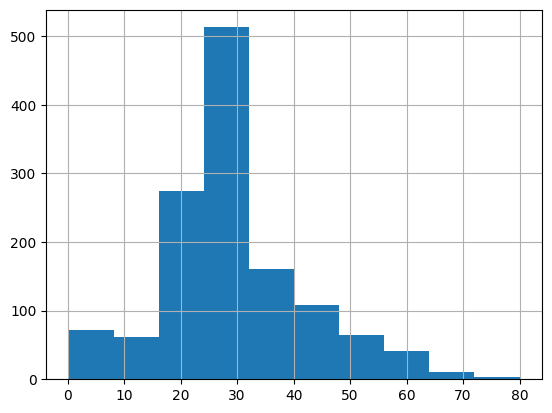

In [10]:
# simple imputer with numeric data

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X= imputer.fit_transform(data[["age"]]) # double bracker returns a column, simple brackets will return an array
## IMPORTANT syntax. You will give a validation error if you only have 1 bracket


data['age'] = X[:,0] # two dimensional array in numpi -> index the array with the brackets. 
## : means all rows, 0 means first column of what I get back. Reassign it back to age.
data.age.hist()

[['S']
 ['S']
 ['S']
 ...
 ['C']
 ['C']
 ['S']]


<Axes: >

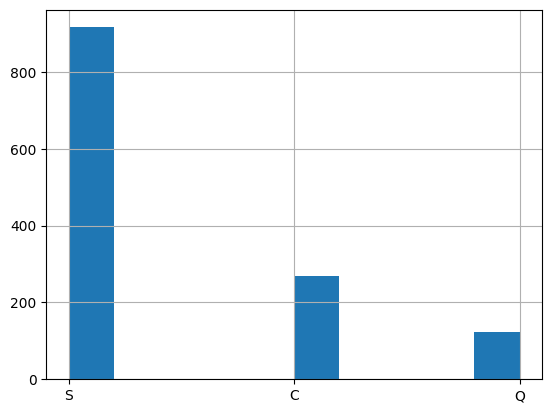

In [14]:
# simple impute with embarked (non numeric data)
# if i try to use median, mean, it will fail as it is not numeric

## YOU CAN ONLY USE MOST FREQUENT

imputer = SimpleImputer(strategy="most_frequent")
X= imputer.fit_transform(data[["embarked"]]) # double bracker returns a column, simple brackets will return an array
## IMPORTANT syntax. You will give a validation error if you only have 1 bracket
print(X)

data['embarked'] = X[:,0] # two dimensional array in numpi -> index the array with the brackets. 
## : means all rows, 0 means first column of what I get back. Reassign it back to age.
data.embarked.hist()

#### **Exercise 2**

Sklearn does not handle strings.  Use an encoder to transform any string columns into numbers. If there are any categorical columns where label encoding won't work, use a one-hot encoder.

In [15]:
# label encoding, assign number to every category
# SKLEARN, only for target feature. Do not use label encoding for target column
# want to use ordinal encoder sintead of a label encoder

# why want to use one hot encoder instead of label encoder

# order matters -> use one hot encoder
# with one hot encoder, it drops one of the columns.
# drop equals, usualy 1st
# this is because it changes the data into binary, when one of the entires is all zeroes, it will represent the column dropped
# by default, what you get back is a spare matrix (where is only looks as 1s) that is not compatabile with pandas
# you will need to use a keywork which is spare_output = false (something like that). you will get a full matrix.

In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data_clean = data[["sex","age","sibsp","parch","embarked","survived"]]
ohe = OneHotEncoder(drop="first", sparse_output=False)
X= ohe.fit_transform(data[["embarked","sex"]])
X

data_clean[ohe.get_feature_names_out()] = X

data_clean = data_clean.drop(["sex","embarked"],axis=1)
data_clean

/tmp/ipykernel_3646/3604181258.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[ohe.get_feature_names_out()] = X
/tmp/ipykernel_3646/3604181258.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[ohe.get_feature_names_out()] = X
/tmp/ipykernel_3646/3604181258.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,age,sibsp,parch,survived,embarked_Q,embarked_S,sex_male
0,S,0,0,1,0.0,1.0,0.0
1,S,1,2,1,0.0,1.0,1.0
2,S,1,2,0,0.0,1.0,0.0
3,S,1,2,0,0.0,1.0,1.0
4,S,1,2,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
1304,C,1,0,0,0.0,0.0,0.0
1305,C,1,0,0,0.0,0.0,0.0
1306,C,0,0,0,0.0,0.0,1.0
1307,C,0,0,0,0.0,0.0,1.0


#### **Exercise 3**

Using 5-fold cross-validation, examine the performance of a LogisticRegression classifier. 

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

lr= LogisticRegression()
X = data_clean.drop("survived", axis=1)
y = data_clean['survived']

result = cross_val_score(lr,X,y,cv=5)
result

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1223, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/_array_api.py", line 751, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'S'


In [30]:
np.mean(result)

NameError: name 'result' is not defined

#### **Exercise 4**

Replace the logistic regression classifier with a decision tree classifier.  Which works better?  Why do you think that is?

In [34]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
X = data_clean.drop("survived", axis=1)
y = data_clean['survived']

result = cross_val_score(dt,X,y,cv=5)
result

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/tree/_classes.py", line 1009, in fit
    super()._fit(
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/tree/_classes.py", line 252, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py", line 645, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/_array_api.py", line 751, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/codespace/.local/lib/python3.12/site-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'S'


#### **Exercise 5:** 

See if you can get the decision tree classifier to perform better by adjusting your imputation procedure to use a KNNImputer.

#### **Exercise 6:**

Try using a `GridSearchCV` to optimize the DecisionTree algorithm.  What is the best performance you can achieve?